In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import datetime
import glob
from pathlib import Path
from sp00kyvectors.core import Vector
from sp00kyvectors.dataframes import SpookyDF

In [2]:
folder_path = Path("/Users/lila/data_viz/data")
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
all_dfs = []
# Append the rest of the CSVs without headers
for file in all_files:
    df = pd.read_csv(file)
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df.head()

,Timestamp,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,...,Color_G,Color_B,Color_C,BME680_Temp,Gas,Humidity,Pressure,GPS_Latitude,GPS_Longitude,GPS_Speed
0,8.75115,4.183850,0.053839,0.000764,-0.008858,0.013286,0.38738,-0.22946,-0.67970,16.5,...,0.0,0.0,19.308711,78038.0,53.611331,1010.510860,NaN,NaN,NaN,0.815296
1,8.755338,4.200002,-0.001795,0.000764,-0.013592,0.016493,0.38374,-0.22386,-0.68040,17.5,...,0.0,0.0,19.316328,19495.0,53.528989,1010.516422,NaN,NaN,NaN,0.812597
2,8.772686,4.177868,0.026321,0.004887,-0.013592,0.018784,0.38094,-0.23282,-0.65870,17.5,...,0.0,0.0,19.362031,19441.0,53.477198,1010.523319,NaN,NaN,NaN,0.795742
3,8.749954,4.219743,0.034696,0.002291,-0.009927,0.016952,0.37450,-0.23730,-0.67354,17.5,...,0.0,0.0,19.410664,19622.0,53.374561,1010.535061,NaN,NaN,NaN,0.806361
4,8.763115,4.179065,0.009571,0.005651,-0.011148,0.017104,0.38374,-0.23142,-0.68908,17.5,...,0.0,0.0,19.400703,19176.0,53.098152,1010.534443,NaN,NaN,NaN,0.821975


In [3]:
# Custom Cleaning
combined_df = combined_df[ (combined_df['Pressure'] > 500) ]
pressure = Vector(data_points=combined_df['Pressure'])

In [4]:
# In class cleaning
pressure.drop_na()
pressure.drop_outliers()


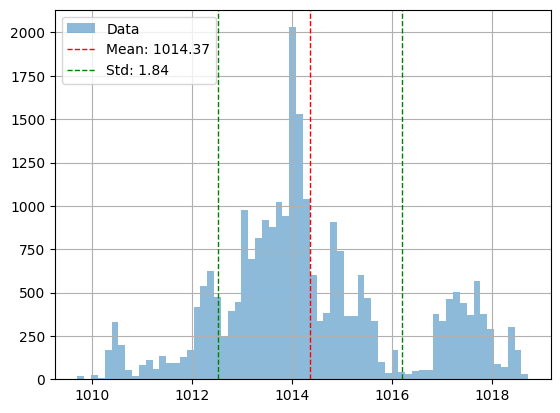

In [5]:
pressure.plot_basic_stats()

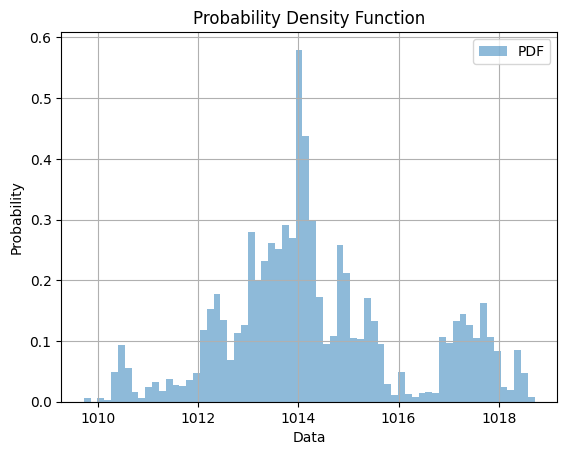

In [6]:
pressure.plot_pdf()

In [7]:
humidity = Vector(data_points=combined_df['Humidity'])

In [8]:
humidity.drop_na()
humidity.drop_outliers()

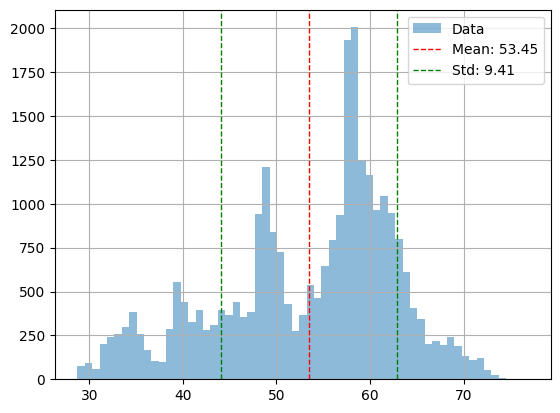

In [9]:
humidity.plot_basic_stats()

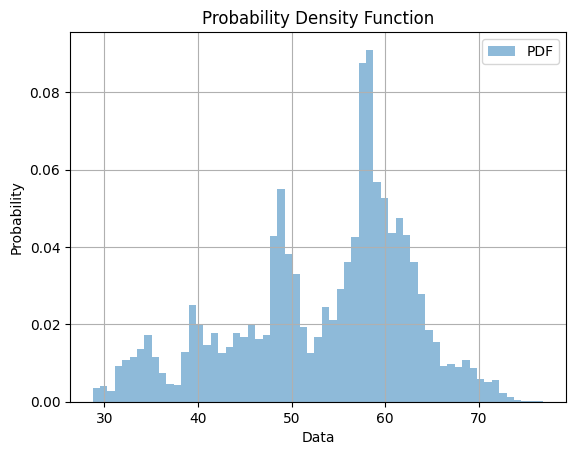

In [10]:
humidity.plot_pdf()

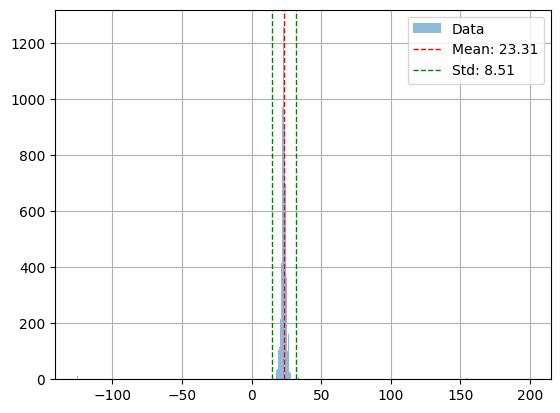

In [11]:
temp = Vector(data_points=combined_df['BME680_Temp'])
temp.plot_basic_stats()

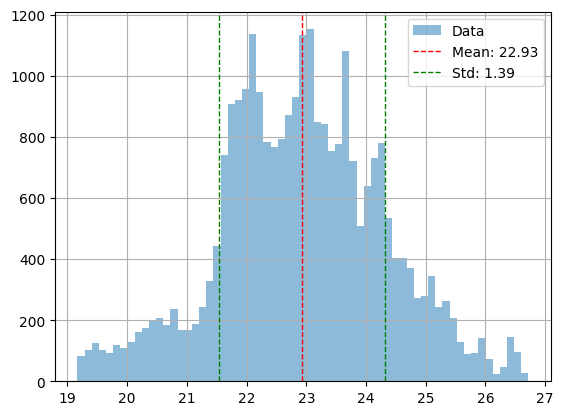

In [12]:
temp.drop_na()
temp.drop_outliers()
temp.plot_basic_stats()